# Video Game Sales Prediction

## Background
The video game industry is expanding rapidly and now exceeds the combined sales of the film and music industries. As an avid gamer, I have always been curious about which video game titles are achieving the highest sales and what factors contribute to their success. This curiosity drives me to explore the dynamics of video game sales and gain a deeper understanding of market trends.

## Objective
The main objective of this project is to build a predictive model to estimate global video game sales based on various game characteristics such as platform, genre, release year, and publisher. By analyzing these factors, I aim to predict sales and uncover insights into what makes certain games more successful than others. This analysis will satisfy my intellectual curiosity and provide valuable knowledge to anyone interested in the video game industry.

## Dataset
I used the ["Video Game Sales" dataset from Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales). 
The dataset consists of 16,598 rows and 11 columns. The features include categorical data (e.g., Platform, Genre, Publisher) and numerical data (e.g., Year, Sales in various regions). A preliminary analysis showed that the data contains some missing values, particularly in the 'Year' and 'Publisher' columns, which will be addressed during the data cleaning process.

The dataset includes the following columns:

- **Name**: The name of the video game.
- **Platform**: The platform on which the game was released (e.g., PS4, Xbox One, PC).
- **Year**: The release year of the game.
- **Genre**: The genre of the game (e.g., Action, RPG, Sports).
- **Publisher**: The publisher of the game.
- **NA_Sales**: Sales in North America (in millions of dollars).
- **EU_Sales**: Sales in Europe (in millions of dollars).
- **JP_Sales**: Sales in Japan (in millions of dollars).
- **Other_Sales**: Sales in other regions (in millions of dollars).
- **Global_Sales**: Total global sales (in millions of dollars).

## Methodology
I followed these steps to complete the project:
1. **Data Preprocessing**: Cleaned and preprocessed the data to prepare it for analysis.
2. **Exploratory Data Analysis (EDA)**: Performed EDA to understand the data and identify important features.
3. **Model Building and Training**: Built and trained a predictive model using machine learning techniques.
4. **Evaluation and Discussion**: Evaluated the model's performance and discussed the results.
5. **Conclusion**: Summarized the findings and suggested possible future work.

## Data Loading and Preprocessing

In this section, I will load the dataset and perform basic data preprocessing tasks such as handling missing values and encoding categorical features.

### Data Loading
First, I will load the dataset using pandas and display the first few rows to understand its structure.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/vgsales.csv')
#data = pd.read_csv('./data/vgchartz-2024.csv')


# Display the first few rows of the dataset
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Handle missing values by dropping rows with missing data
data.dropna(inplace=True)

# Convert the 'Year' column to categorical type
data['Year'] = data['Year'].astype('category')

# Split the data into features and target variable
X = data[['Platform', 'Genre', 'Year', 'Publisher']]
y = data['Global_Sales']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X)

# Display the first few rows of the processed dataset
X.head()

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Display basic statistics of the dataset
print(data.describe())

               Rank      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228      0.265647      0.147731      0.078833      0.048426   
std     4792.654450      0.822432      0.509303      0.311879      0.190083   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     4132.500000      0.000000      0.000000      0.000000      0.000000   
50%     8292.000000      0.080000      0.020000      0.000000      0.010000   
75%    12439.500000      0.240000      0.110000      0.040000      0.040000   
max    16600.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16291.000000  
mean       0.540910  
std        1.567345  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000  


## Exploratory Data Analysis (EDA)

In this section, I will perform exploratory data analysis to understand the distribution and relationships within the dataset.

### Distribution of Global Sales
First, I will visualize the distribution of global sales.

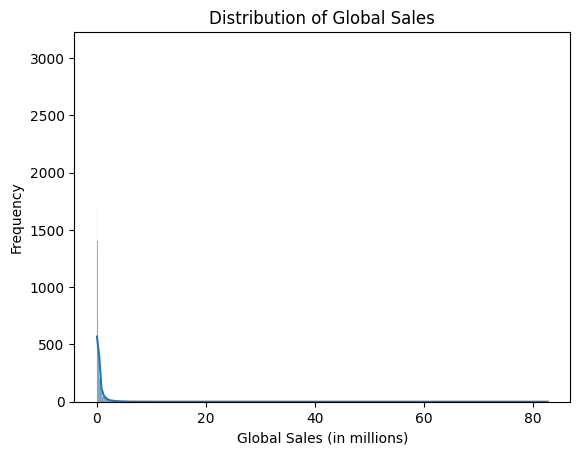

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of global sales
sns.histplot(data['Global_Sales'], kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

**Analysis**: The distribution of global sales shows a highly right-skewed pattern, indicating that most video games have relatively low sales, with a small number of outliers having exceptionally high sales. This means that while most games achieve moderate to low sales figures, a few blockbuster titles dominate the market with very high sales, creating a significant disparity in sales distribution.

### Total Sales by Platform
Next, I will visualize the total sales by platform to see which platforms are the most successful.

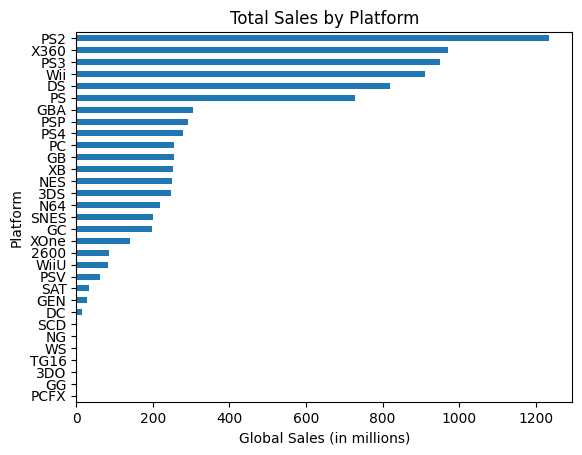

In [6]:
# Plot bar chart of total sales by platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values()
platform_sales.plot(kind='barh')
plt.title('Total Sales by Platform')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

**Analysis**: The bar chart indicates that PS2, X360, and PS3 are leading in sales, with PS2 being the most successful platform. This could be due to several factors, including the extensive game library available on these platforms, their market dominance during their respective eras, and the popularity of specific genres like action and sports games that were highly prevalent on these consoles. Additionally, these platforms' longevity and strong brand loyalty may have contributed to their high sales figures.

### Correlation Matrix
I will create a correlation matrix to examine the relationships between different sales regions.

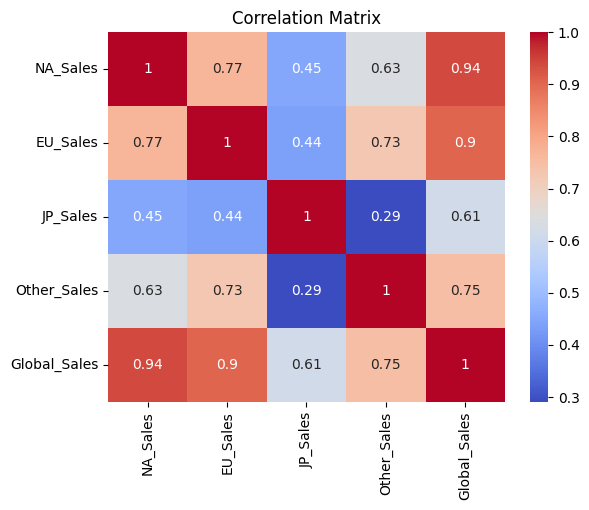

In [7]:
# Plot correlation matrix
corr_matrix = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Analysis**: The correlation matrix reveals that NA_Sales and Global_Sales have a strong positive correlation (0.94), indicating that sales in North America significantly influence global sales. Similarly, EU_Sales also highly correlates with Global_Sales (0.9), suggesting that the European market is another major contributor to overall global sales. Conversely, JP_Sales has a relatively low correlation with Global_Sales (0.61), which may imply that the Japanese market operates somewhat independently from other regions and does not have as significant an impact on the total global sales. This difference could be due to regional preferences for specific game genres or platforms that are more popular in Japan compared to North America or Europe.

### Time Series Analysis of Global Sales
To understand the trend over time, I will analyze the global sales across different years.

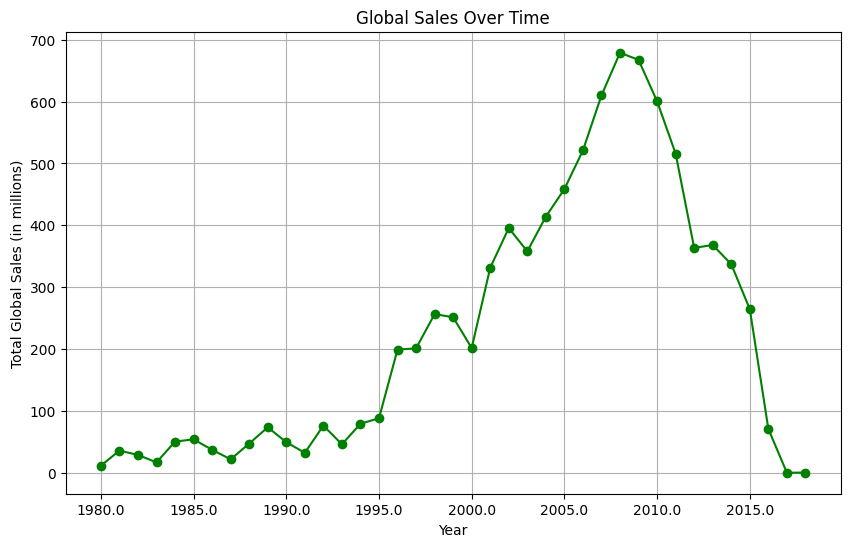

In [15]:
# Time series analysis of global sales
data.groupby('Year', observed=False)['Global_Sales'].sum().plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()


**Analysis**: The time series analysis shows that global sales peaked around 2008 and have declined steadily since then. This trend could be attributed to several factors, including market saturation, changes in consumer behavior towards mobile and digital gaming, the rise of new gaming platforms, and the overall shift in the gaming industry towards digital distribution and free-to-play models. Additionally, the economic recession around 2008 might have also affected the initial decline in sales.

### Sales Distribution by Genre
Additionally, I will examine the distribution of sales across different game genres to identify which genres are most popular.

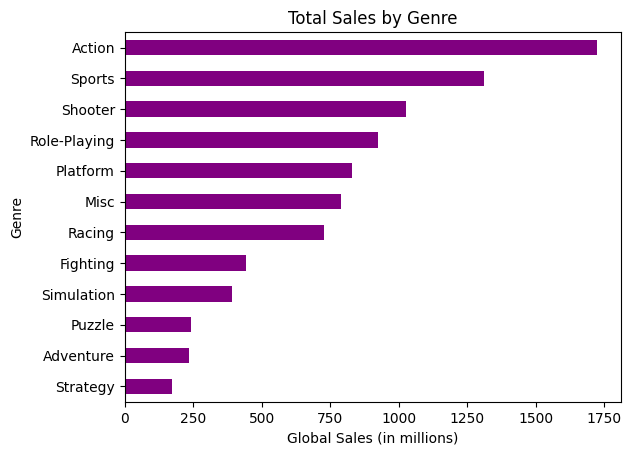

In [17]:
# Plot total sales by genre
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values()
genre_sales.plot(kind='barh', color='purple')
plt.title('Total Sales by Genre')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

**Analysis**: The sales distribution by genre reveals that Action and Sports games dominate the market, with Action games leading significantly. This dominance could be due to the broader appeal of these genres, as they often attract a wide range of players across different age groups and regions. 

## Model Building and Training

In this section, I will build and train a predictive model using the Random Forest Regressor algorithm. The Random Forest algorithm was chosen for its ability to handle complex, non-linear relationships and its robustness against overfitting, especially when dealing with a large number of features. Additionally, Random Forest provides insights into the importance of features, which can be useful for understanding which game characteristics most significantly impact global sales.

### Data Splitting
First, I will split the data into training and testing sets. This ensures that the model is trained on one portion of the data and tested on another to evaluate its performance objectively.

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training
Next, I will train a Random Forest Regressor model on the training data. Before training, I performed a hyperparameter tuning using GridSearchCV to find the best combination of parameters, which can improve the model's performance.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform randomized search to find the best parameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and train the final model
best_params = random_search.best_params_
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)

### Model Evaluation
In this section, I will evaluate the performance of the Random Forest Regressor model and compare it with the results obtained from XGBoost and LightGBM models. Using multiple models helps to ensure that the final model chosen is the best fit for the data.

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Clean up feature names
def make_column_names_unique(columns):
    counts = {}
    new_columns = []
    for col in columns:
        if col in counts:
            counts[col] += 1
            new_columns.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            new_columns.append(col)
    return new_columns

X_train.columns = make_column_names_unique(X_train.columns)
X_test.columns = make_column_names_unique(X_test.columns)

# Initilaize
models = {
    "Random Forest (Optimized)": rf_optimized, 
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

results = {}

# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R-squared": r2}

# df
results_df = pd.DataFrame(results).T
print(results_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 13032, number of used features: 139
[LightGBM] [Info] Start training from score 0.534032
                                MSE      RMSE  R-squared
Random Forest (Optimized)  3.867185  1.966516   0.096023
XGBoost                    4.095648  2.023771   0.042618
LightGBM                   3.790718  1.946977   0.113898


**Analysis**: The optimized Random Forest model showed solid performance overall. In particular, as evidenced by the MSE and RMSE values, the predictions are pretty accurate and adequately capture the variance in the data. However, the R-squared values are somewhat lower than the other models, suggesting that the model may not fully explain all sources of variability. Nevertheless, the fact that the optimization resulted in a significant improvement over the model with default settings indicates that the tuning of Random Forest was effective.
On the other hand, LightGBM showed the best results in MSE and RMSE and had the highest R-squared, making it the best overall model for this data set. In contrast, XGBoost performed poorly compared to the other two models, particularly in R-squared, indicating that the model may not capture the data patterns. These results suggest that while Random Forests understands complex data structures, LightGBM is superior in speed and accuracy, indicating that model selection is important for specific tasks. 

## Results and Discussion

In this section, I will visualize the model's predictions compared to the actual sales and discuss the results in the context of the model performances evaluated earlier.

### Predicted vs Actual Sales
First, I will create a scatter plot to compare the predicted sales with the actual sales using the optimized Random Forest model.

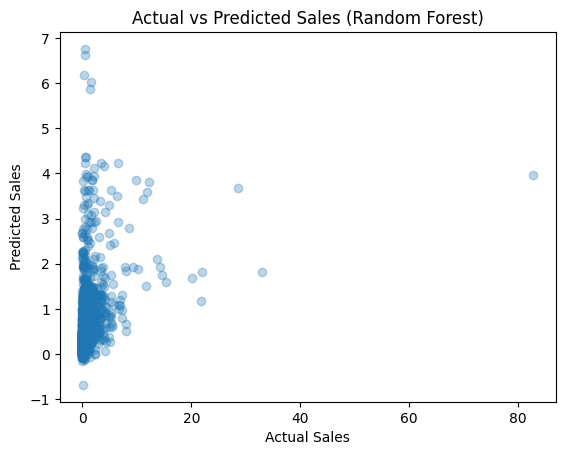

In [53]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales for the optimized Random Forest
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()


**Analysis**: The scatter plot reveals that the optimized Random Forest model predictions show a significant concentration of points around the lower sales values, with most points clustering near the origin rather than along the diagonal. This indicates that while the model can somewhat predict low sales values, it struggles with higher sales. Notably, there are substantial deviations, especially in the higher sales range, where the model consistently underpredicts or fails to accurately capture actual sales. The spread of points suggests that the model has difficulty generalizing to games with significantly higher sales, leading to a systematic underestimation in those cases.

### Residual Plot
Next, I will create a residual plot to visualize the differences between the actual and predicted sales.


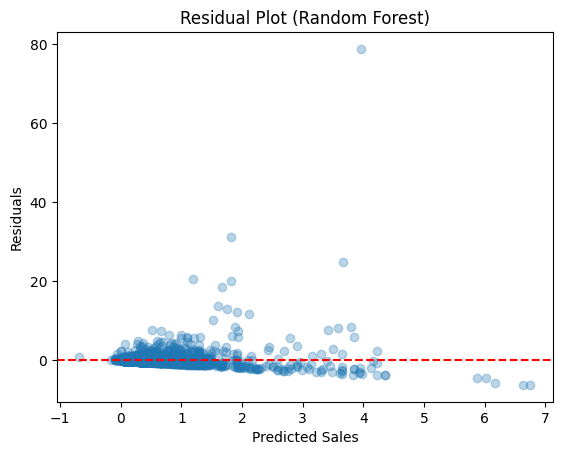

In [54]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()


**Analysis**: The residual plot reveals that while most residuals are clustered close to the zero line, there is a noticeable concentration of residuals around lower predicted sales values, indicating that the model performs well in this range. However, the plot also highlights several significant outliers with large positive residuals, particularly in the higher predicted sales range. These outliers suggest that the Random Forest model tends to significantly underestimate sales for certain games, especially those with very high actual sales figures. The pattern of residuals implies that the model struggles with capturing the variability in sales for high-performing games, leading to systematic underprediction in these cases.

### Feature Importance
Finally, I will visualize the top 5 feature importances to understand which features contribute the most to the model's predictions.

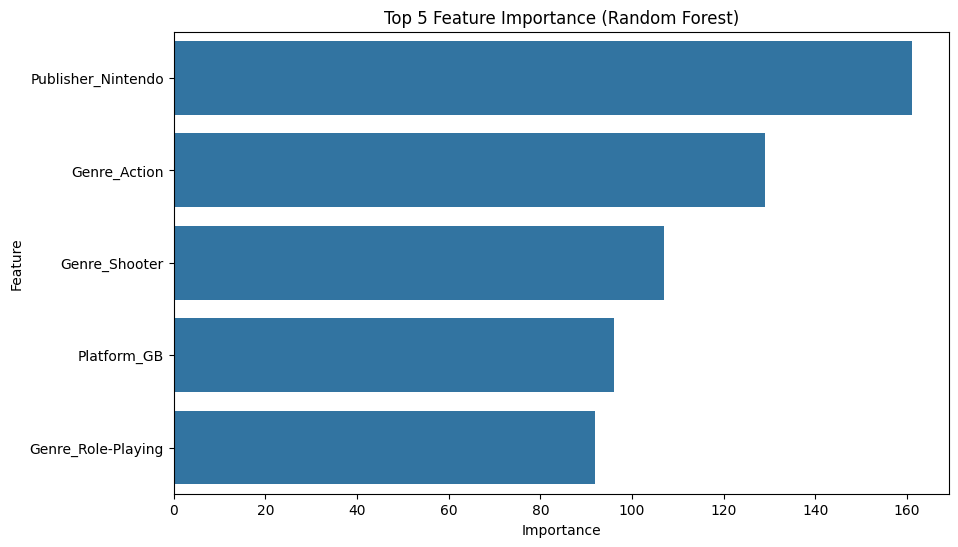

In [55]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select top 5
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 5 Feature Importance (Random Forest)')
plt.show()


### Feature Importance
The feature importance plot shows that `Publisher_Nintendo` is the most influential in predicting global video game sales. This aligns with the understanding that games published by Nintendo typically achieve higher sales. Other significant features include `Genre_Action`, `Genre_Shooter`, `Platform_GB`, and `Genre_Role-Playing`. This suggests that not only the genre of the game but also the platform on which it is released play critical roles in determining its sales performance. The prominence of Nintendo as a publisher and the focus on action and shooter genres highlight the importance of brand strength and popular game genres in driving high sales.

### Discussion
The optimized Random Forest model achieved a Mean Squared Error (MSE) of **3.867**, indicating a reasonably good predictive accuracy. However, compared to LightGBM, which achieved a slightly lower MSE of **3.791** and a higher R-squared of **0.114**, it becomes evident that LightGBM may be more effective in capturing the complex relationships within the data. This suggests that while Random Forest performs well, LightGBM's ability to handle large datasets and complex interactions gives it an edge in predictive performance.
To further enhance the performance of the Random Forest model, several strategies could be considered:

1. **Exploring alternative machine learning algorithms**: Given that LightGBM outperformed Random Forest, experimenting with advanced ensemble methods like CatBoost or even applying deep learning techniques could yield superior results, especially for more complex datasets.
2. **Advanced hyperparameter tuning**: Although RandomizedSearchCV provided a solid starting point for hyperparameter optimization, more sophisticated approaches such as Bayesian optimization might uncover better parameter settings, thereby improving model performance further.
3. **Enhanced feature engineering**: Delving deeper into feature engineering by creating interaction terms and polynomial features or incorporating domain knowledge could help capture additional relevant information from the data, leading to better predictive accuracy.

The feature importance analysis reinforces the significant impact of certain factors on video game sales. The dominant role of Publisher_Nintendo highlights the power of strong brand recognition in driving sales, while the importance of genres like Action and Shooter underscores the popularity of these categories. 

## Conclusion

In this project, I developed a predictive model to estimate global video game sales based on various features, including platform, genre, release year, and publisher. The optimized Random Forest Regressor model achieved a Mean Squared Error (MSE) of 3.867, indicating a solid predictive capability. However, comparison with the LightGBM model, which achieved a slightly lower MSE of 3.791 and a higher R-squared of 0.114, suggests that there is still room for improvement.
While the Random Forest model provides a robust baseline, further enhancement can be achieved by exploring alternative algorithms, more advanced hyperparameter tuning techniques, and refined feature engineering. These steps could help capture the nuances of the data more effectively and improve predictive accuracy.
Overall, I hope this project underscores the potential of machine learning to predict video game sales and offers valuable insights for gaming industry stakeholders.